This notebook was adapted from a data tutorial from EARS33

# Introduction

This notebook will help you perform exploratory data analysis (EDA) on data from [Richardson et al., 2019](https://pubs.geoscienceworld.org/gsa/geology/article/47/5/423/569535/Influences-of-climate-and-life-on-hillslope), in which the authors compiled data on the [diffusivity of soil-mantled hillslopes](https://earthsurface.readthedocs.io/en/latest/hillslope.html). 

Here are the footnotes from the paper:

a If the exact location was not able to be identified, we used the location that best matched the site description. If multiple measurements were made for a region, we report the mean lat/lon for the study.

b Uncertainties are reported as they were presented in the original journals. If uncertainties were not reported, we calculated and reported the standard deviation of D when possible. 

c Rock category: 1 = unconsolidated, 2 = sedimentary, 3 = Igneous/metamorphic.

d Technique category: 1 = Scarp modeling, 2 = Laplacian and erosion rates, 3 = LEM, 4 = Colluvial flux and slope, 5 = erosion rate and Laplacian.

e Vegetation category: 1 = Arid/desert, 2 = grasslands/scrublands, 3 = savannah/lightly forested, 4=forested.

f West et al. (2014) reported the range of D for noth-facing and south-facing slopes. We reported the mean of these values.


# Import libraries you'll need

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Bring in the data and clean it

Other than moving the footnote text to a different file and saving the result as a .csv, I've given you the file as it was uploaded to the Geology Data Repository. Annoyingly, many journals prefer formetting supplemental tables to be human-, rather than machine-readable. Special characters and weird spacing come with the territory. You could edit these things in Excel, but let's see if we can clean this (already pretty clean) data with code.  

In [2]:
# Load the .csv as a pandas data frame. What problems might you anticipate?
df = pd.read_csv("2019149_TableDR1.csv", encoding= 'unicode_escape')
df

,ï»¿Source,Site Location[a],Latitude (deg),Longitude (deg),D (cm2/yr),D[b] uncertainty (cm2/yr),AI,MAP (cm/yr),Underlying lithology description,Lithology category[c],Technique description,Technique category[d],Vegetation description,Vegetation category[e]
0,Almond et al. [2008],"Charwell Basin, New Zealand",-42.450,173.357,50,20,1.42,116.0,Loess underlain by fluvial gravel terraces,1.0,Erosion rate and curvature. Estimate is for th...,2.0,"Podocarp, hardwood, and beech forest",3.0
1,Almond et al. [2008],"Ahuriri, New Zealand",-43.702,172.584,70,20,0.76,68.8,Thick loess deposits underlain by altered basalt,1.0,137Cs fallout nuclides (50 yr timescale) and c...,2.0,Recolonization of forest during Holocene. Rece...,2.0
2,Arrowsmith et al. (1998),"Carrizo Plain, CA, USA",35.271,-119.827,86,8,0.33,46.7,Conglomerate and alluvial fan units.,2.0,Scarp modeling,1.0,Grasses and shrubs,2.0
3,Avouac and Peltzer (1993),"Hotan Region, Xinjiang, China",36.800,80.500,33,14,0.03,3.3,Loose fan gravels,1.0,Scarp modeling,1.0,Unvegetated,1.0
4,Avouac et al. (1993),"Tien Shan, China",44.048,86.790,55,25,0.19,18.4,Loose fan gravels,1.0,Scarp modeling,1.0,Grasses and shrubs,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Ok, this looks a little ugly - there are extra rows and columns and there are some funky symbols going on since they got translated from that journal supplement. 

I'll get you started with renaming the first column

In [3]:
# You can give df.rename a dictionary of old and new names like the following:
df.rename(columns={'ï»¿Source':'Source'}, inplace=True)
# inplace=True means it replaces the column name in the original df rather
# than makes a copy
df.head()

,Source,Site Location[a],Latitude (deg),Longitude (deg),D (cm2/yr),D[b] uncertainty (cm2/yr),AI,MAP (cm/yr),Underlying lithology description,Lithology category[c],Technique description,Technique category[d],Vegetation description,Vegetation category[e]
0,Almond et al. [2008],"Charwell Basin, New Zealand",-42.450,173.357,50,20,1.42,116.0,Loess underlain by fluvial gravel terraces,1.0,Erosion rate and curvature. Estimate is for th...,2.0,"Podocarp, hardwood, and beech forest",3.0
1,Almond et al. [2008],"Ahuriri, New Zealand",-43.702,172.584,70,20,0.76,68.8,Thick loess deposits underlain by altered basalt,1.0,137Cs fallout nuclides (50 yr timescale) and c...,2.0,Recolonization of forest during Holocene. Rece...,2.0
2,Arrowsmith et al. (1998),"Carrizo Plain, CA, USA",35.271,-119.827,86,8,0.33,46.7,Conglomerate and alluvial fan units.,2.0,Scarp modeling,1.0,Grasses and shrubs,2.0
3,Avouac and Peltzer (1993),"Hotan Region, Xinjiang, China",36.800,80.500,33,14,0.03,3.3,Loose fan gravels,1.0,Scarp modeling,1.0,Unvegetated,1.0
4,Avouac et al. (1993),"Tien Shan, China",44.048,86.790,55,25,0.19,18.4,Loose fan gravels,1.0,Scarp modeling,1.0,Grasses and shrubs,2.0


Next you have to get rid of all those NaN (not a number) rows. Learn how to [drop rows and columns with NaNs](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html) or [particular columns](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) that are read from converting Excel files to csv files. 

In [4]:
# Code block to eliminate extra rows here
df.dropna(axis=0, how='all', inplace=True)

After you've gotten rid of all the NaNs, now can we plot data? 

Pandas has a very acceptable [built-in histogram plotting function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html) that can help you quickly visualize your data. 

Try this line out...

In [5]:
df.hist(column='D (cm2/yr)')

ValueError: hist method requires numerical or datetime columns, nothing to plot.

Hmm what the heckity heck is this?

In [6]:
df.dtypes

Source                               object
Site Location[a]                     object
Latitude (deg)                      float64
Longitude (deg)                     float64
D (cm2/yr)                           object
D[b] uncertainty (cm2/yr)            object
AI                                  float64
MAP (cm/yr)                         float64
Underlying lithology description     object
Lithology category[c]               float64
Technique description                object
Technique category[d]               float64
Vegetation description               object
Vegetation category[e]              float64
dtype: object

Ugh, looks like you're gonna have to check out a thorough answer to [changing data types](https://stackoverflow.com/questions/15891038/change-column-type-in-pandas) in Pandas columns. 

Depending how you do this you might have to  [replace](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html) some strings


In [7]:
# Code block to change data types here
df[['D (cm2/yr)', 'D[b] uncertainty (cm2/yr)']] = df[['D (cm2/yr)', 'D[b] uncertainty (cm2/yr)',]].apply(pd.to_numeric, errors='coerce')

df.dtypes

Source                               object
Site Location[a]                     object
Latitude (deg)                      float64
Longitude (deg)                     float64
D (cm2/yr)                          float64
D[b] uncertainty (cm2/yr)           float64
AI                                  float64
MAP (cm/yr)                         float64
Underlying lithology description     object
Lithology category[c]               float64
Technique description                object
Technique category[d]               float64
Vegetation description               object
Vegetation category[e]              float64
dtype: object

Nice, now you have a nice clean dataset for slicing and visualizing! 

Please plot a histogram of diffusion values:

array([[<Axes: title={'center': 'D (cm2/yr)'}>]], dtype=object)

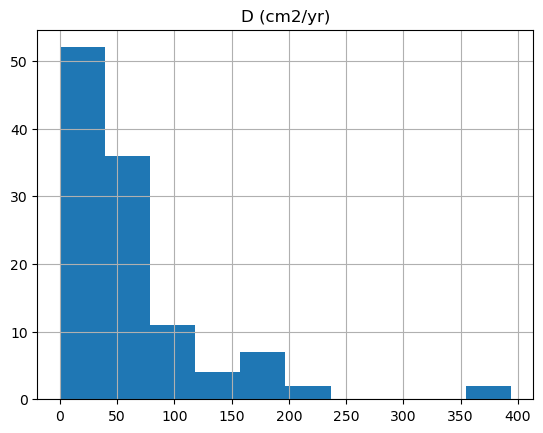

In [8]:
# Histogram code here 
df.hist(column='D (cm2/yr)')

# Reproduce Figure 2: climate variables versus diffusivity

Now for grouping by study! It's nontrivial to create the "other studies" group, so I'll demosntrate the code here:

In [9]:
df['Source_grouping'] = df['Source'].replace(df['Source'].value_counts().index[2:], 'Other studies')

# This code counts the number of unique entries in "Source" and lists them in descending order. 
# Then, preserving the top two occurrences ("Callaghan (2012)" and "This study"), 
# give me the indices of every other "Source" (don't forget, Python starts counting
# at zero, so Callaghan is 0, and This study is 1.) and replace their values
# with the string "Other studies". Then I put it in a column specifically for
# our plotting adventures


print (df['Source_grouping'].value_counts())

# versus

print ('\n', 'versus\n', df['Source'].value_counts()[0:10])

Source_grouping
Other studies       57
Callaghan (2012)    48
This study           9
Name: count, dtype: int64

 versus
 Source
Callaghan (2012)                                    48
This study                                           9
Ben-Asher et al. (2017)                              5
Hanks et al. (1984)                                  4
Almond et al. [2008]                                 2
McGuire (2014).                                      2
Mattson and Bruhn (2001)                             2
Hurst et al. (2013)                                  2
Perron et al. (2012)                                 2
Reneau (1988) reported in Heimsath et al. (2005)     2
Name: count, dtype: int64


Now that I've done that, you're free to plot by groups! See how close you can get your plot to Figure 2!!

You'll want the documentation for [markers](https://matplotlib.org/stable/api/markers_api.html) along with [examples](https://matplotlib.org/stable/gallery/lines_bars_and_markers/scatter_star_poly.html) and for [colors](https://matplotlib.org/3.5.0/gallery/color/named_colors.html). 

Text(0, 0.5, 'D (cm$^2$/yr)')

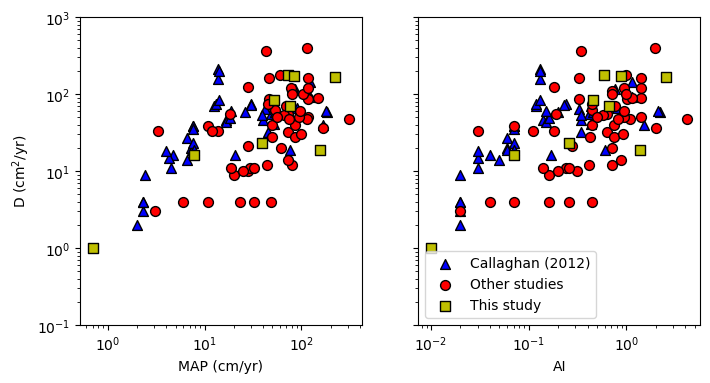

In [14]:
# Insert plot here 

# I'll get you started:

fig, ax = plt.subplots(1,2, figsize=(8,4), sharey=True)

# sharey=True means you only have to control and plot one Y axis

# The next bit is a dictionary in which we will assign colors and markers
# to the three groups. As long as the keys (the first values) are equal
# to the study that is being plotted 

# Fill in the value associated with each key (the '') with an appropriate color 
# and marker so it looks like Figure 2. 

# Will you be that person who finds the exact hex code from the paper figures?

color_dict = {'Callaghan (2012)': 'b',
              'Other studies' : 'r',
              'This study' : 'y'}
marker_dict = {'Callaghan (2012)': "^",
              'Other studies' : "o",
              'This study' : 's'}


# Now, fill in the appropriate x and y data with the column titles

for site, group in df.groupby(by='Source_grouping'): 
    group.plot.scatter(x= 'MAP (cm/yr)', y='D (cm2/yr)',
                       color=color_dict[site],marker=marker_dict[site],
                       edgecolor='k', s=50,
                       ax=ax[0])
    group.plot.scatter(x= 'AI', y='D (cm2/yr)',
                       color=color_dict[site],marker=marker_dict[site],
                       edgecolor='k', s=50,
                       ax=ax[1], legend=True, label=site)


# Set the scale and range of your axes

ax[0].set_yscale('log')
ax[0].set_ylim(1E-1, 1E3)
ax[0].set_xscale('log')
ax[1].set_xscale('log')

# Don't forget to make the label fancy with a superscript!
ax[0].set_ylabel('D (cm$^2$/yr)')